In [1]:
%matplotlib inline
#%matplotlib notebook
#%matplotlib qt
import matplotlib as mpl
mpl.get_backend()

'module://matplotlib_inline.backend_inline'

In [2]:
mpl.backends

<module 'matplotlib.backends' from '/users/mbopf/miniconda3/envs/tfhub/lib/python3.9/site-packages/matplotlib/backends/__init__.py'>

In [3]:
!ls

0221428AP.dcm			Dicom_PixelRepresentation.ipynb
0221428AP.jpg			dicom_view.py
0311959-PA.dcm			DisplayDicom.ipynb
0311983-PA.dcm			filename-jpg.txt
0522100-AP.dcm			filenames.txt
0522100-AP_mod.dcm		files.txt
0522100-LAT.dcm			image_browse.py
0522100-LAT_mod.dcm		jpgConvert.sh
1488096-PA.jpg			jpg_errors.txt
alt_loop			jpg_files.txt
browse_image_directory.ipynb	jpgTestImages
buttons2.py			missing_pixel_rep.txt
buttons.py			missingPR_count.txt
convert_dcmtk.sh		photo-interp_renamed.csv
dcm_files.txt			pngTestImages
dcm_to_jpg-png.ipynb		remove_borders.ipynb
dicom_display_all_fields.ipynb	rtplan2.dcm
Dicom_fields.ipynb		Scratch.ipynb
Dicom_Photo-Interpret.ipynb


In [4]:
import os
import glob
def get_file_list(path: str, wild: str = None) -> list:
    ret_list = []
    if not path.endswith('/'):
        path = path + '/'
    
    if wild:
        for filename in glob.glob(path + wild):
            ret_list.append(filename)
    else:
        for filename in os.listdir(path):
            ret_list.append(filename)
    
    return ret_list

In [5]:
import matplotlib.pyplot as plt
import random

random.seed(11)
image_dir = '/slurm_storage/mbopf/data/PedTB/renamed'
full_list = get_file_list(image_dir, "*AP*.dcm")
random.shuffle(full_list)
batch_size = 8
batch_num = 1
print(full_list[:8])

['/slurm_storage/mbopf/data/PedTB/renamed/044252-AP.dcm', '/slurm_storage/mbopf/data/PedTB/renamed/044660-AP.dcm', '/slurm_storage/mbopf/data/PedTB/renamed/046016-AP.dcm', '/slurm_storage/mbopf/data/PedTB/renamed/N0379116-AP.dcm', '/slurm_storage/mbopf/data/PedTB/renamed/0220120-AP.dcm', '/slurm_storage/mbopf/data/PedTB/renamed/N0379500-AP.dcm', '/slurm_storage/mbopf/data/PedTB/renamed/045608-AP.dcm', '/slurm_storage/mbopf/data/PedTB/renamed/046616-AP.dcm']


1 0 8
/slurm_storage/mbopf/data/PedTB/renamed/044252-AP.dcm
Dataset.file_meta -------------------------------
(0002, 0000) File Meta Information Group Length  UL: 194
(0002, 0001) File Meta Information Version       OB: b'\x01\x00'
(0002, 0002) Media Storage SOP Class UID         UI: Secondary Capture Image Storage
(0002, 0003) Media Storage SOP Instance UID      UI: 1.3.46.670589.30.1.2.95595295058.1.2220.1333995356645
(0002, 0010) Transfer Syntax UID                 UI: Explicit VR Little Endian
(0002, 0012) Implementation Class UID            UI: 2.16.840.1.114151.100.1.1
(0002, 0013) Implementation Version Name         SH: 'MergeCOM3_390'
-------------------------------------------------
(0008, 0008) Image Type                          CS: ['ORIGINAL', 'PRIMARY']
(0008, 0016) SOP Class UID                       UI: Secondary Capture Image Storage
(0008, 0018) SOP Instance UID                    UI: 1.3.46.670589.30.1.2.95595295058.1.2220.1333995356645
(0008, 0020) Study Date       

/users/mbopf/miniconda3/envs/tfhub/lib/python3.9/site-packages/pydicom/valuerep.py:290: UserWarning: Invalid value for VR UI: '10.0.1.70.044252'. Please see <https://dicom.nema.org/medical/dicom/current/output/html/part05.html#table_6.2-1> for allowed values for each VR.
  warnings.warn(msg)
/users/mbopf/miniconda3/envs/tfhub/lib/python3.9/site-packages/pydicom/valuerep.py:290: UserWarning: Invalid value for VR UI: '10.0.1.70.044660'. Please see <https://dicom.nema.org/medical/dicom/current/output/html/part05.html#table_6.2-1> for allowed values for each VR.
  warnings.warn(msg)
/users/mbopf/miniconda3/envs/tfhub/lib/python3.9/site-packages/pydicom/valuerep.py:290: UserWarning: Invalid value for VR UI: '10.0.1.70.046016'. Please see <https://dicom.nema.org/medical/dicom/current/output/html/part05.html#table_6.2-1> for allowed values for each VR.
  warnings.warn(msg)


Dataset.file_meta -------------------------------
(0002, 0000) File Meta Information Group Length  UL: 190
(0002, 0001) File Meta Information Version       OB: b'\x01\x00'
(0002, 0002) Media Storage SOP Class UID         UI: Computed Radiography Image Storage
(0002, 0003) Media Storage SOP Instance UID      UI: 1.3.46.670589.30.1.2.1.95595292118.1343486494609.1
(0002, 0010) Transfer Syntax UID                 UI: Explicit VR Little Endian
(0002, 0012) Implementation Class UID            UI: 2.16.840.1.114151.100.1.1
(0002, 0013) Implementation Version Name         SH: 'MergeCOM3_390'
-------------------------------------------------
(0008, 0000) Group Length                        UL: 746
(0008, 0008) Image Type                          CS: ['ORIGINAL', 'PRIMARY']
(0008, 0016) SOP Class UID                       UI: Computed Radiography Image Storage
(0008, 0018) SOP Instance UID                    UI: 1.3.46.670589.30.1.2.1.95595292118.1343486494609.1
(0008, 0020) Study Date          

Dataset.file_meta -------------------------------
(0002, 0000) File Meta Information Group Length  UL: 200
(0002, 0001) File Meta Information Version       OB: b'\x00\x01'
(0002, 0002) Media Storage SOP Class UID         UI: Secondary Capture Image Storage
(0002, 0003) Media Storage SOP Instance UID      UI: 1.2.528.1.1001.100.4.3941.1837.1377958475.20190709012900937
(0002, 0010) Transfer Syntax UID                 UI: Explicit VR Little Endian
(0002, 0012) Implementation Class UID            UI: 1.2.528.1.1001.2.20060808.1
(0002, 0013) Implementation Version Name         SH: 'GEHC_DCM06_1'
-------------------------------------------------
(0008, 0008) Image Type                          CS: ['DERIVED', 'SECONDARY', 'SINGLE PLANE']
(0008, 0016) SOP Class UID                       UI: Secondary Capture Image Storage
(0008, 0018) SOP Instance UID                    UI: 1.2.528.1.1001.100.4.3941.1837.1377958475.20190709012900937
(0008, 0020) Study Date                          DA: '201904

/users/mbopf/miniconda3/envs/tfhub/lib/python3.9/site-packages/pydicom/valuerep.py:290: UserWarning: Invalid value for VR UI: '0220120'. Please see <https://dicom.nema.org/medical/dicom/current/output/html/part05.html#table_6.2-1> for allowed values for each VR.
  warnings.warn(msg)
/users/mbopf/miniconda3/envs/tfhub/lib/python3.9/site-packages/pydicom/valuerep.py:290: UserWarning: Invalid value for VR UI: '10.0.1.70.045608'. Please see <https://dicom.nema.org/medical/dicom/current/output/html/part05.html#table_6.2-1> for allowed values for each VR.
  warnings.warn(msg)


Dataset.file_meta -------------------------------
(0002, 0000) File Meta Information Group Length  UL: 198
(0002, 0001) File Meta Information Version       OB: b'\x00\x01'
(0002, 0002) Media Storage SOP Class UID         UI: Secondary Capture Image Storage
(0002, 0003) Media Storage SOP Instance UID      UI: 1.2.528.1.1001.100.4.4625.4221.795751423.20190731162029000
(0002, 0010) Transfer Syntax UID                 UI: Explicit VR Little Endian
(0002, 0012) Implementation Class UID            UI: 1.2.528.1.1001.2.20060808.1
(0002, 0013) Implementation Version Name         SH: 'GEHC_DCM06_1'
-------------------------------------------------
(0008, 0008) Image Type                          CS: ['DERIVED', 'SECONDARY', 'SINGLE PLANE']
(0008, 0016) SOP Class UID                       UI: Secondary Capture Image Storage
(0008, 0018) SOP Instance UID                    UI: 1.2.528.1.1001.100.4.4625.4221.795751423.20190731162029000
(0008, 0020) Study Date                          DA: '20190311

/users/mbopf/miniconda3/envs/tfhub/lib/python3.9/site-packages/pydicom/valuerep.py:290: UserWarning: Invalid value for VR UI: '10.0.1.70.046616'. Please see <https://dicom.nema.org/medical/dicom/current/output/html/part05.html#table_6.2-1> for allowed values for each VR.
  warnings.warn(msg)


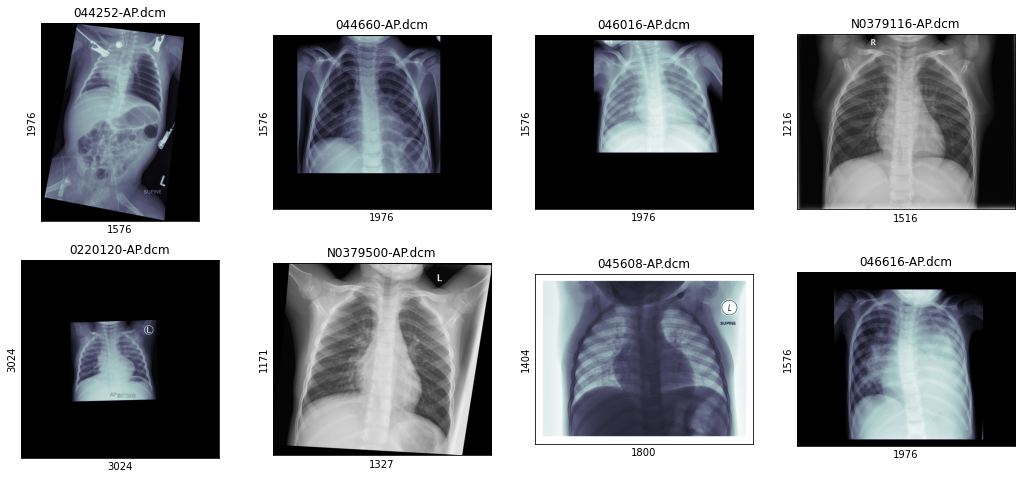

In [6]:
import pydicom
fig, axs = plt.subplots(nrows=2, ncols=4, figsize=(18,8))
start = batch_size * (batch_num - 1)
end = batch_size * batch_num
print(batch_num, start, end)
for ax, file in zip(axs.ravel(), full_list[start:end]):
    print(file)
    basename = os.path.basename(file)
    dicom_ds = pydicom.read_file(file, force=True)
    print(dicom_ds)
    pixel_array = dicom_ds.pixel_array
    ishape = pixel_array.shape
    #print(ishape[0])
    ax.set_title(basename)
    ax.tick_params(bottom=False, left=False, labelbottom=False, labelleft=False)
    ax.set_xlabel(ishape[1])
    ax.set_ylabel(ishape[0])
    ax.imshow(pixel_array, cmap=plt.cm.bone) 
    
plt.show()
batch_num += 1
